In [262]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [331]:
input_data_size = 30

gen_sine_wave_start_point = 0.0
gen_sine_wave_step = 0.05

L1_neurons = 200
L2_neurons = 400
L3_neurons = 50

In [332]:
def generate_part_of_sine_wave(start, step, size = input_data_size):
    y_points = np.zeros((1, size))
    x_points = np.zeros((1, size))

    x_point = start
    
    for index in range(size):
        x_points[0, index] = x_point
        y_points[0, index] = np.sin(x_point)
        x_point += step
    
    y_next_point = np.sin(x_point)
        
    return x_points, y_points, y_next_point

In [360]:
activation_fn = tf.nn.relu # tf.nn.sigmoid # tf.nn.relu

In [361]:
with tf.name_scope('placeholders'):
    anchor = tf.placeholder('float', [1, input_data_size], name = "anchor")
    follower = tf.placeholder('float')

In [362]:
with tf.name_scope('neural_network'):
    hidden1 = tf.contrib.layers.fully_connected(anchor, L1_neurons, activation_fn = activation_fn)  
    hidden2 = tf.contrib.layers.fully_connected(hidden1, L2_neurons, activation_fn = activation_fn)
    hidden3 = tf.contrib.layers.fully_connected(hidden2, L3_neurons, activation_fn = activation_fn)
    model = tf.contrib.layers.fully_connected(hidden3, 1, activation_fn = None)

    loss = tf.nn.l2_loss(model - follower)

In [363]:
with tf.name_scope('optimizer'):
    train_op = tf.train.AdamOptimizer().minimize(loss)

In [364]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())

step_range = 100000

for step in range(step_range):
    x_start_point = np.random.normal() * 10

    _, y_points, y_next_point = generate_part_of_sine_wave(x_start_point, gen_sine_wave_step)

    _, loss_result = sess.run([train_op, loss],
                              feed_dict={anchor: y_points, 
                                         follower: y_next_point})

    if step % (step_range / 10) == 0:
        print('iteration {}, loss={}'.format(step, loss_result))

iteration 0, loss=0.0008461252436973155
iteration 10000, loss=4.954074483976001e-08
iteration 20000, loss=6.051215677871369e-06
iteration 30000, loss=1.6540003571208217e-06
iteration 40000, loss=0.002181718125939369
iteration 50000, loss=1.0301852171323844e-06
iteration 60000, loss=1.3463024473026053e-08
iteration 70000, loss=8.211209490127658e-13
iteration 80000, loss=1.4067360609715251e-07
iteration 90000, loss=7.044805556688516e-07


In [365]:
x_points, y_points, y_next_point = generate_part_of_sine_wave(np.random.normal(), gen_sine_wave_step)

predict_point = sess.run(model, feed_dict={anchor: y_points}) 

print('next_point = {}, predict={}'.format(y_next_point, predict_point))

next_point = 0.029551785186689886, predict=[[0.04301759]]


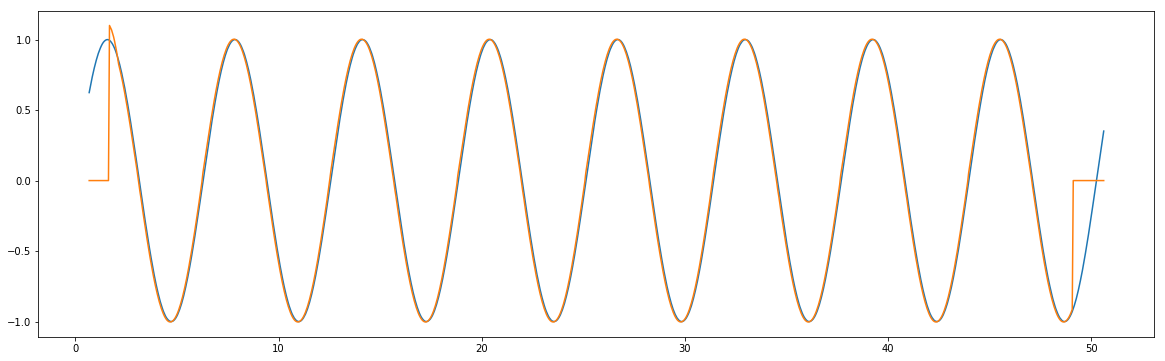

In [366]:
x_points, y_points, y_next_point = generate_part_of_sine_wave(np.random.normal() * 10, gen_sine_wave_step, 1000)
y_points = np.round(np.sin(x_points), 3)

predict_input_points = np.zeros((1, input_data_size))
predict_points = np.zeros(len(x_points[0]))

for index in range(len(x_points[0])):
    if index > 20 and len(x_points[0]) - index > input_data_size:
        for sub_count in range(input_data_size):            
            predict_input_points[0, sub_count] = y_points[0, index - (input_data_size - sub_count)]
            
        predict_points[index - 1] = sess.run(model, feed_dict={anchor: predict_input_points})

plt.figure(figsize=(20, 6))
           
plt.plot(x_points[0], y_points[0])
plt.plot(x_points[0], predict_points)
plt.show()